# MAE6292 - Homework \# 4

Image filtering

## Import Modules



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import cv2
import scipy.signal
from mae6292.imshow import cv2_imshow

import importlib

## Problem 1 (Convolution)

In this part, we define a function `convolve2D(img, filter)` that performs 2D convolution `img * filter`

\begin{align*}
\mathrm{img\_filtered}[i,j] = \sum_{k,l=-W}^W \text{img}[i-k,j-l] \text{filter}[k,l]
\end{align*}

where it is assumed that the image is padded by **zero** values. You may follow the steps given below, or you can follow your own idea. But, it will be slow, if the above is implemented by four for loops.

In [2]:
def convolve2D(img, filter):   
    assert (filter.shape[0]-1) % 2 == 0, 'filter size should be odd'
    W = int((filter.shape[0]-1)/2) # filter half width
    N_rows, N_cols = img.shape # image height and width
    
    # 1. define "img_padded" whose np.array size is (N_rows + 2W, N_cols + 2W), 
    # such that it corresopnds to the img padded by zero values 
    # img_padded = 
    img_padded = np.pad(img,((W, W), (W, W)), mode='constant', constant_values=0)

    # 2. define an empty "img_filtered," whose np.array size is (N_rows, N_cols)
    # img_filtered = 
    img_filtered = np.zeros((N_rows, N_cols))
                            
    # 3. define "filter_flipped" using np.flip for convolution below
    # filter_flipped = 
    filter_flipped = np.flip(np.flip(filter, axis = 0), axis = 1)
    
    for i in range(N_rows):
        for j in range(N_cols):
            # 3. define "img_clipped" that corresponds to the clip of "img_padded" starting at (i,j).
            # Its size is equal to the filter,            
            # img_clipped = img_padded[???
            img_clipped = img_padded[i:i + 2 * W + 1, j:j + 2 * W + 1].copy()
            
            # 4. ensure "img_clipped" is floating valued to avoid errors caused by integer * floating number
            img_clipped.astype('float64')
            
            # 5. perform cross-correlation between "img_clip" and "filter_flipped"
           # img_filtered[i,j]=(img_clipped * filter_flipped).sum()
            img_filtered[i, j] = (img_clipped * filter_flipped).sum()
            
    # 6. return img_filtered
    return img_filtered

Verify your function with the following `img_test` and `filter_test`.

1. The padded image should be
```
img_padded=
 [[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  2.  3.  4.  5.  0.]
 [ 0.  6.  7.  8.  9. 10.  0.]
 [ 0. 11. 12. 13. 14. 15.  0.]
 [ 0. 16. 17. 18. 19. 20.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]
```

2. The flipped filter should be
```
filter_flipped=
[[8 7 6]
 [5 4 3]
 [2 1 0]]
```
 
3. The `img_clipped` for `(i,j)=(0,0)` should be
```
 [[ 0.  0.  0.]
 [ 0.  1.  2.]
 [ 0.  6.  7.]]
```

4. The `img_filtered` should be
```
img_filtered=
 img_filtered=
 [[ 16.  41.  56.  71.  68.]
 [ 75. 156. 192. 228. 195.]
 [180. 336. 372. 408. 330.]
 [264. 452. 485. 518. 392.]]
```

Print your filtered image and make it sure that it is consistent with the above value.

In [59]:
# Taking the test image and filter to be :

img_test = np.array([[10, 11, 12, 13, 14],
                     [15, 16, 17, 19, 19],
                     [20, 21, 22, 23, 24],
                     [25, 26, 27, 28, 29]])

filter_test = np.array([[8, 7, 6],
                        [5, 4, 3],
                        [2, 1, 0]])

# Using the convolution function
img_filtered_test = convolve2D(img_test, filter_test)

# Print padded image, flipped filter, img_clipped, and filtered image
print("Padded Image:")
img_padded = np.pad(img_test, ((1, 1), (1, 1)), mode='constant', constant_values=0)
print(img_padded)

print("\nFlipped Filter:")
flipped_filter = np.flip(np.flip(filter_test, axis=0), axis=1)
print(flipped_filter)

print("\nImg Clipped:")
W = int((filter_test.shape[0] - 1) / 2)
img_padded = np.pad(img_test, ((W, W), (W, W)), mode='constant', constant_values=0)
img_clipped = img_padded[1: 1 + 2 * W + 1, 1: 1 + 2 * W + 1]
print(img_clipped)

print("\nFiltered Image:")
print(img_filtered_test)


Padded Image:
[[ 0  0  0  0  0  0  0]
 [ 0 10 11 12 13 14  0]
 [ 0 15 16 17 19 19  0]
 [ 0 20 21 22 23 24  0]
 [ 0 25 26 27 28 29  0]
 [ 0  0  0  0  0  0  0]]

Flipped Filter:
[[0 1 2]
 [3 4 5]
 [6 7 8]]

Img Clipped:
[[10 11 12]
 [15 16 17]
 [20 21 22]]

Filtered Image:
[[328. 472. 513. 545. 342.]
 [480. 672. 713. 748. 453.]
 [615. 852. 890. 925. 555.]
 [292. 379. 394. 409. 224.]]


In [60]:
img_test = np.array(range(1,21)).reshape(4,5).astype('uint8')
W = 1
filter_test = np.array(range((2*W+1)**2)).reshape(2*W+1,2*W+1)
img_filtered = convolve2D(img_test,filter_test)

print('img_test=\n',img_test)
print('\nfilter_test=\n',filter_test)
print('\nimg_filtered=\n',img_filtered)


img_test=
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]

filter_test=
 [[0 1 2]
 [3 4 5]
 [6 7 8]]

img_filtered=
 [[ 16.  41.  56.  71.  68.]
 [ 75. 156. 192. 228. 195.]
 [180. 336. 372. 408. 330.]
 [264. 452. 485. 518. 392.]]


## Problem 2 (Gaussian Filter)

The Gaussian filter for given filter half size `W` and standar deviation `sigma` can be constructed as follows.

In [61]:
W = 5
sigma = 3
filter_Gau_1D = cv2.getGaussianKernel(2*W+1, sigma)
filter_Gau_2D = filter_Gau_1D @ filter_Gau_1D.T

We will apply the Gaussian filter as follows.

1. Take a photo of any object of your interest, and save it as `prob2a.png`
2. Load the image in grayscale and show.
3. Filter it with $W = 5, \sigma =3$, using the above `filter_Gau_2D` and the function `convolve2D`. Note that the filter should be flipped first, i.e., 
```
img_filtered=convolve2D(img, np.flip(filter_Gau_2D))
```
In fact, the Gaussian filter is symmetric, and flipping wouldn't change it. 

4. Show and save the filtered image as `prob2b.png`
5. Filter it with your own choice of $W, \sigma$
6. Show and save the filtered iamge as `prob2c.png`
7. Play with $W, \sigma$ and briefly discuss the effects of $W, \sigma$ on the filtered image (you don't have to show all the filtered images).


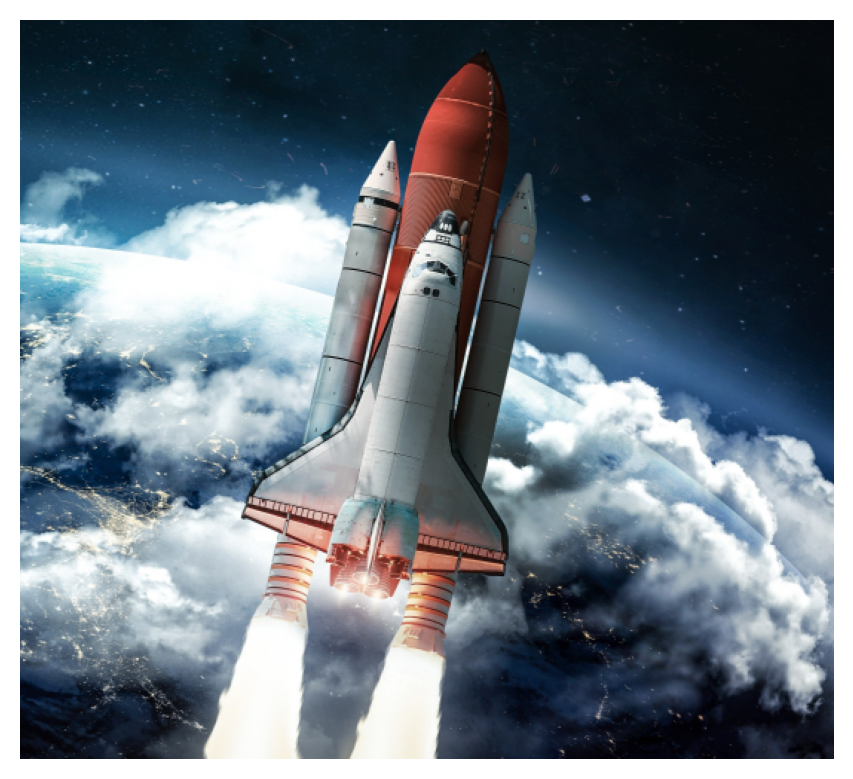

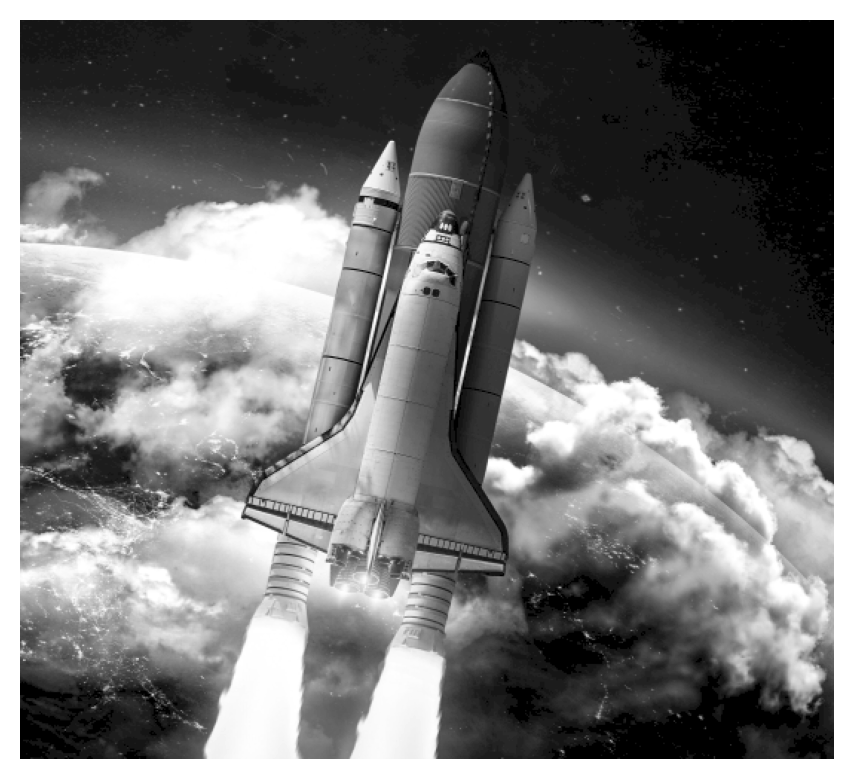

In [62]:
#Question 1 and 2
img = cv2.imread('my_image.png')
cv2_imshow(img)
img_gray = cv2.imread('my_image.png',cv2.IMREAD_GRAYSCALE)
cv2_imshow(img_gray)

In [63]:
#Question 3

# Determine the Gaussian filter parameters
W = 5
sigma = 3

# Create 1D Gaussian filter
filter_Gau_1D = cv2.getGaussianKernel(2*W+1, sigma)

# Create 2D Gaussian filter by taking the outer product of 1D filter with its transpose
filter_Gau_2D = filter_Gau_1D @ filter_Gau_1D.T

# Flip the filter
filter_Gau_2D_flipped = np.flip(filter_Gau_2D)

# Filter the image using convolve2D function
img_filtered = convolve2D(img_gray, filter_Gau_2D_flipped)


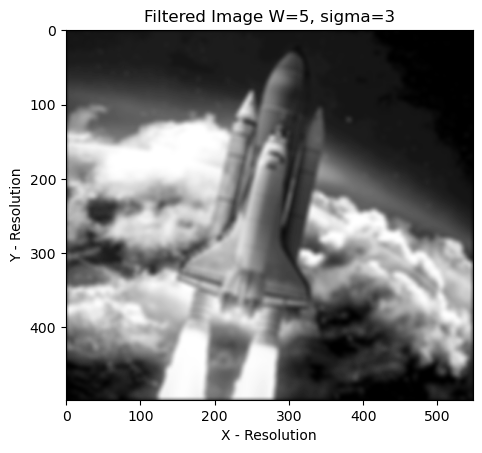

True

In [64]:
# Question 4

#Show and save the filtered image. 
plt.imshow(img_filtered, cmap='gray')
plt.title('Filtered Image W=5, sigma=3')
plt.ylabel('Y - Resolution') 
plt.xlabel('X - Resolution')
plt.show()
cv2.imwrite('prob2b.png', img_filtered)

In [65]:
#Question 5

# Gaussian filter parameters
W_new = 25
sigma_new = 10

# Create 1D Gaussian filter
filter_Gau_1D = cv2.getGaussianKernel(2*W_new+1, sigma_new)

# Create 2D Gaussian filter by outer product of 1D filter
filter_Gau_2D = filter_Gau_1D @ filter_Gau_1D.T

# Flip the Gaussian filter
filter_Gau_2D_flipped = np.flip(filter_Gau_2D)

# Filter the image using convolve2D function with the Gaussian filter
img_filtered_gaussian = convolve2D(img_gray, filter_Gau_2D_flipped)


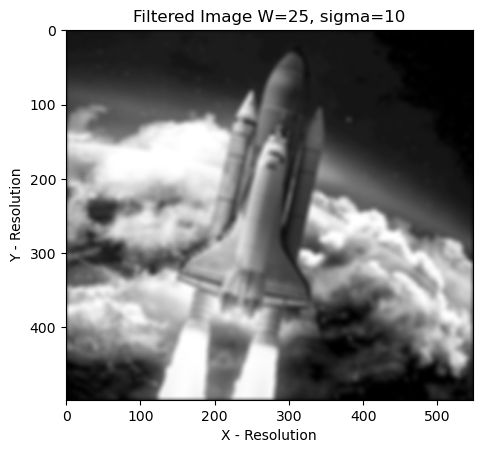

True

In [66]:
#Question 6

#Show and save the filtered image. 
plt.imshow(img_filtered, cmap='gray')
plt.title(f'Filtered Image W={W_new}, sigma={sigma_new}')
plt.ylabel('Y - Resolution') 
plt.xlabel('X - Resolution')
plt.show()
cv2.imwrite('prob2c.png', img_filtered)

In [67]:
# Gaussian filter parameters
W_new = 50
sigma_new = 40

# Create 1D Gaussian filter
filter_Gau_1D = cv2.getGaussianKernel(2*W_new+1, sigma_new)

# Create 2D Gaussian filter by outer product of 1D filter
filter_Gau_2D = filter_Gau_1D @ filter_Gau_1D.T

# Flip the Gaussian filter
filter_Gau_2D_flipped = np.flip(filter_Gau_2D)

# Filter the image using convolve2D function with the Gaussian filter
img_filtered_gaussian = convolve2D(img_gray, filter_Gau_2D_flipped)

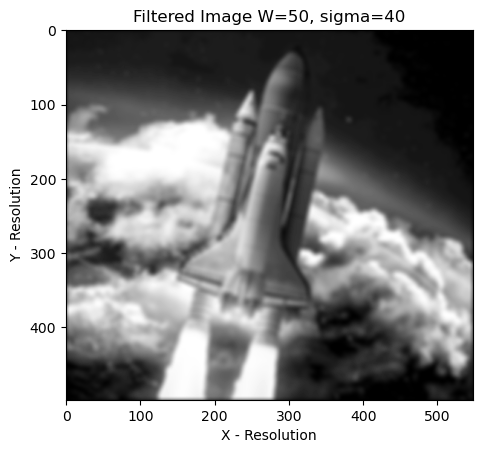

In [68]:
#Question 7

#Show and save the filtered image. 
plt.imshow(img_filtered, cmap='gray')
plt.title(f'Filtered Image W={W_new}, sigma={sigma_new}')
plt.ylabel('Y - Resolution') 
plt.xlabel('X - Resolution')
plt.show()

8. (optional extra **5pt**) Can you extend your `convolve2D` for color images? Filter the each channel of your color photo with a Gaussian filter, and save it into `prob2d.png`

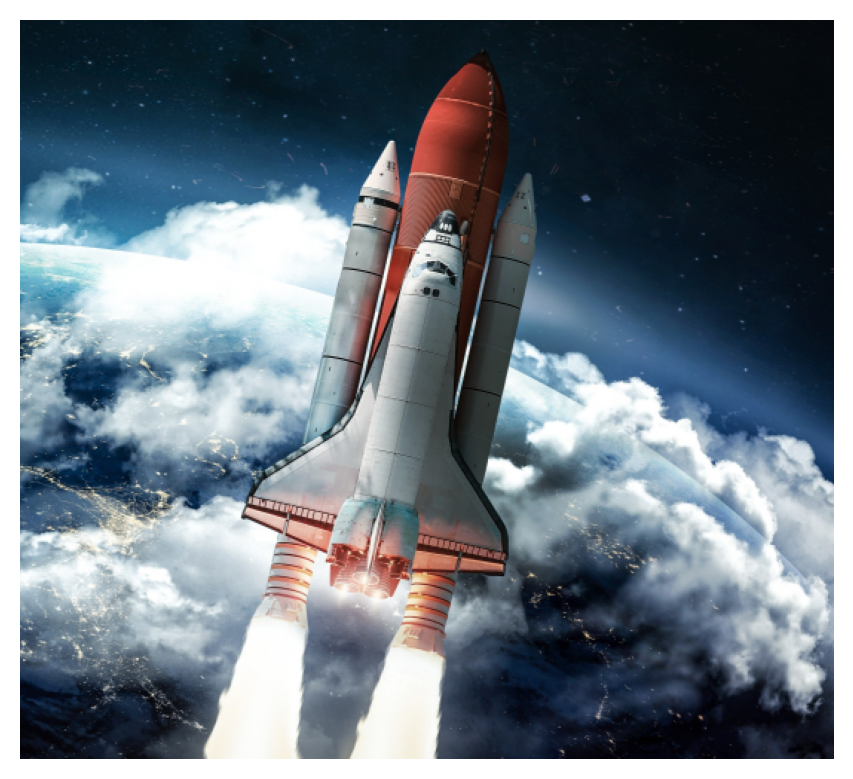

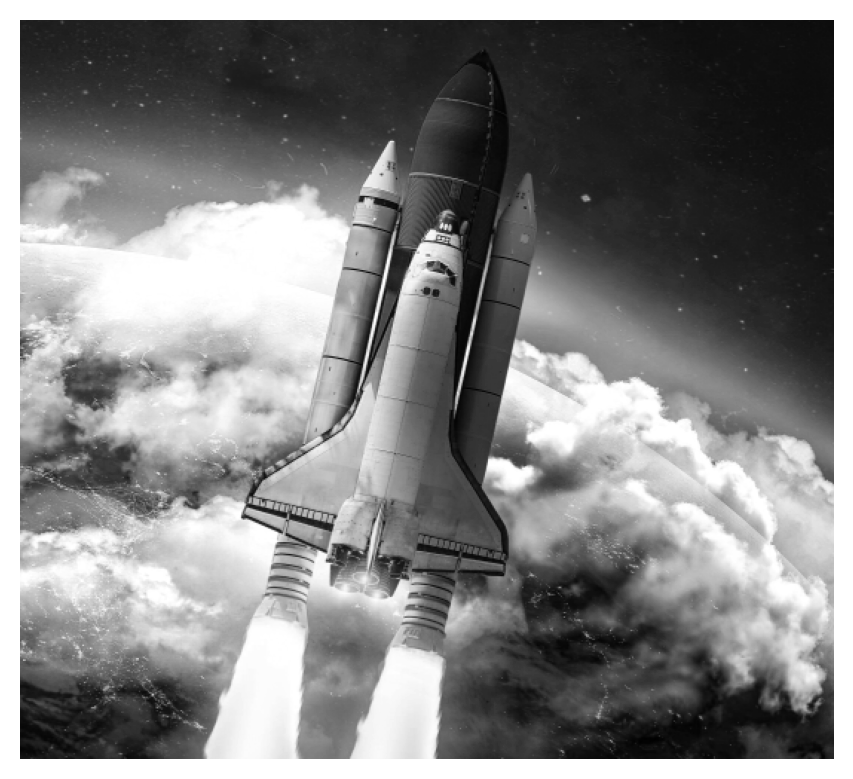

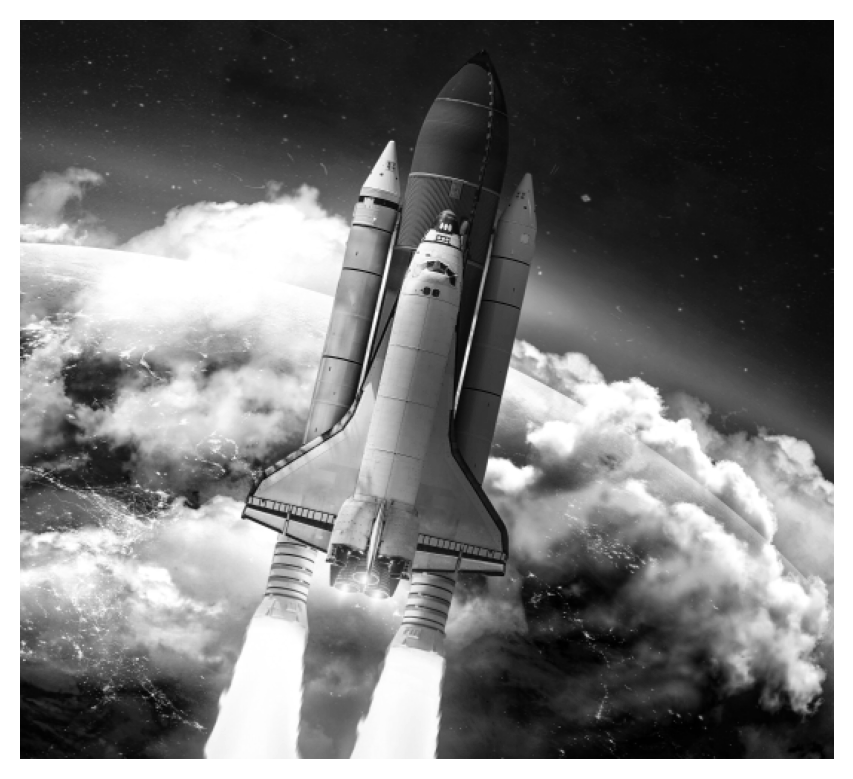

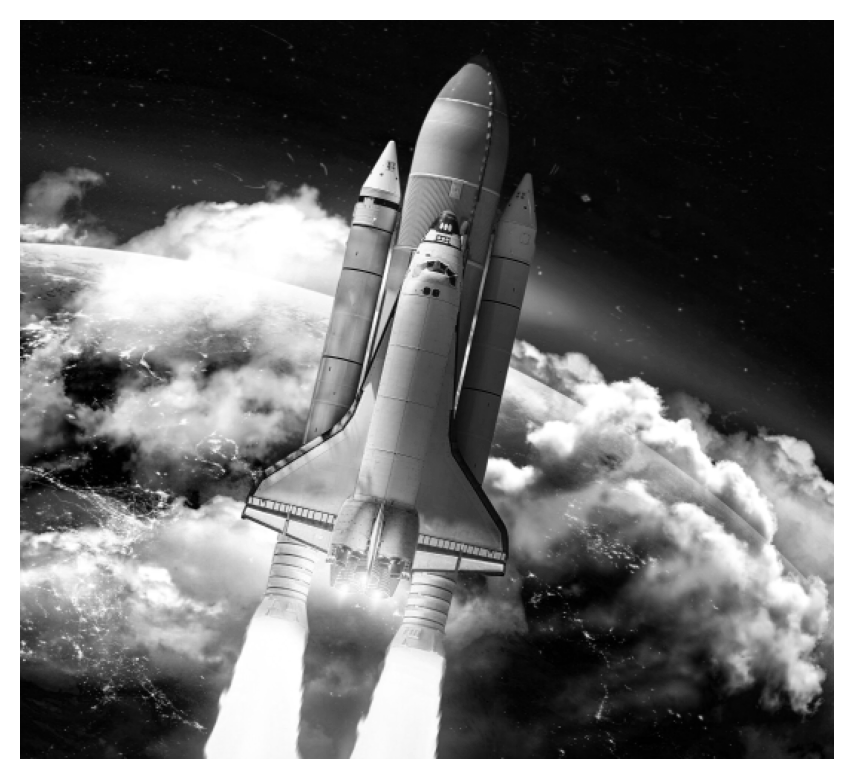

In [70]:
#Question 8

# TODO : seperate the image into the R, G, B components
#      :apply the filter on the 3 different R,G,B component 
#      :Merge the the 3 filtered picture into one color picture

# Split the image into blue, green, and red channels
img = cv2.imread('my_image.png')
b_img, g_img, r_img = cv2.split(img)

#Display the original image and the three color channels
cv2_imshow(img)
cv2_imshow(b_img)
cv2.imwrite('blueimage.png', b_img)
cv2_imshow(g_img)
cv2.imwrite('greenimage.png', g_img)
cv2_imshow(r_img)
cv2.imwrite('redimage.png', r_img)

In [97]:
# Gaussian filter parameters
W_new = 50
sigma_new = 40

# Create 1D Gaussian filter
filter_Gau_1D = cv2.getGaussianKernel(2*W_new+1, sigma_new)

# Create 2D Gaussian filter by outer product of 1D filter
filter_Gau_2D = filter_Gau_1D @ filter_Gau_1D.T

# Flip the Gaussian filter
filter_Gau_2D_flipped = np.flip(filter_Gau_2D)

# Filter the image using convolve2D function with the Gaussian filter
img_filtered_gaussian = convolve2D(img_gray, filter_Gau_2D_flipped)

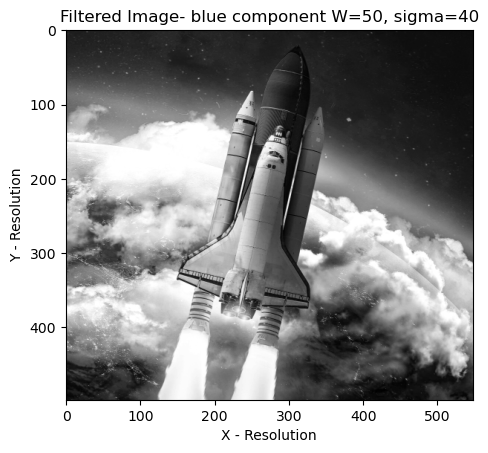

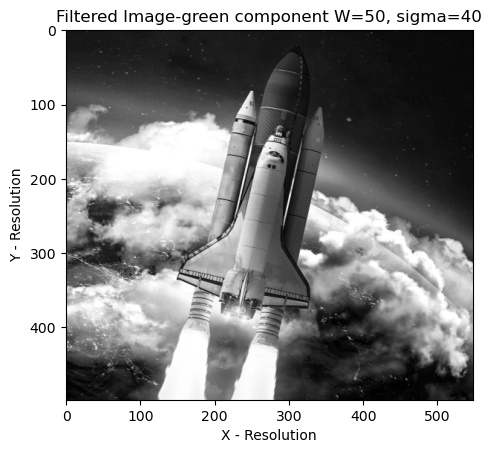

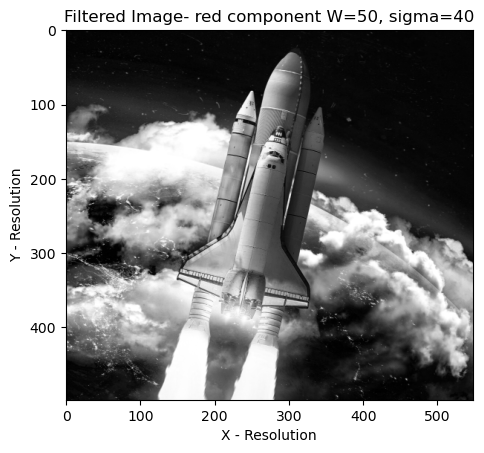

True

In [98]:
#Show and save the filtered image -blue. 
plt.imshow(b_img, cmap='gray')
plt.title(f'Filtered Image- blue component W={W_new}, sigma={sigma_new}')
plt.ylabel('Y - Resolution') 
plt.xlabel('X - Resolution')
plt.show()
cv2.imwrite('prob2d_blue.png',b_img)

#Show and save the filtered image - green. 
plt.imshow(g_img, cmap='gray')
plt.title(f'Filtered Image-green component W={W_new}, sigma={sigma_new}')
plt.ylabel('Y - Resolution') 
plt.xlabel('X - Resolution')
plt.show()
cv2.imwrite('prob2d_green.png',g_img)

#Show and save the filtered image - red. 
plt.imshow(r_img, cmap='gray')
plt.title(f'Filtered Image- red component W={W_new}, sigma={sigma_new}')
plt.ylabel('Y - Resolution') 
plt.xlabel('X - Resolution')
plt.show()
cv2.imwrite('prob2d_red.png',r_img)

True

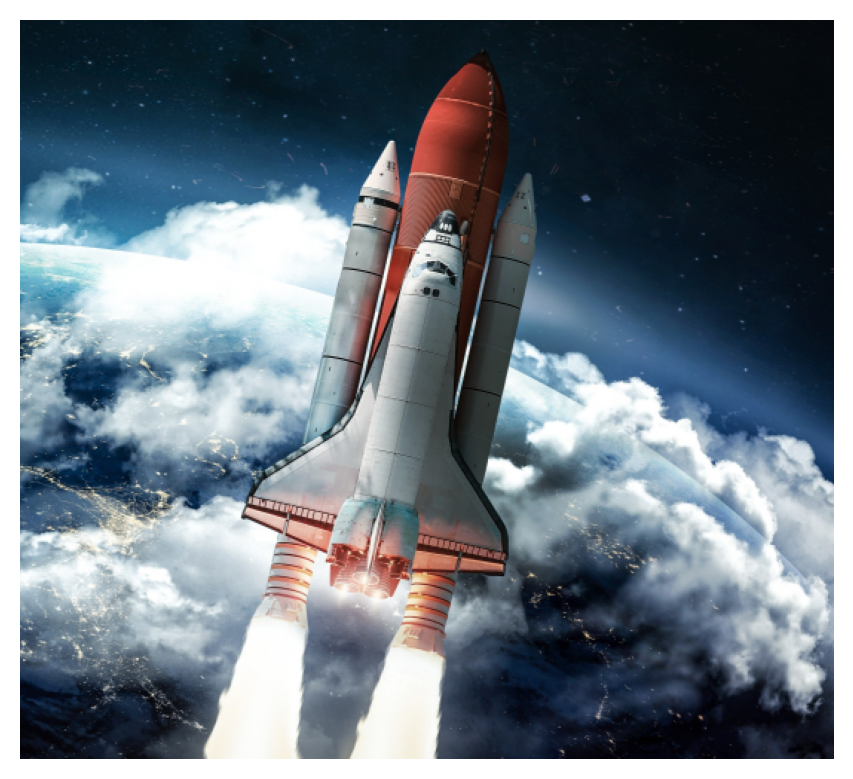

In [100]:
# Stack the channels to create a color image
color_image = cv2.merge([b_img, g_img,r_img ])

# Display the individual channels and the combined color image
cv2_imshow(color_image)
cv2.imwrite('prob2d.png',color_image)

## How to Turn in

Make it sure you add the following files to the repository before pusing it back to github.
1. prob2a.png
2. prob2b.png
3. prob2c.png
4. (prob2d.png)